# Natural Language Processing Project

In this small NLP project I will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews.
I will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

## Imports


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data


In [5]:
df=pd.read_csv('yelp.csv')

**Let's check the data: head, info , and describe methods on yelp.**

In [7]:
df

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [9]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**Creating a new column called "text length" which is the number of words in the text column.**

In [11]:
df['text length']=df['text'].apply(len)

In [12]:
import string
from nltk.corpus import stopwords
len(stopwords.words('english'))

179

In [13]:
def text_analyzer(text):
    t=[char for char in text if char not in string.punctuation]
    t=''.join(t)
    t=t.split()
    t=[word for word in t if word.lower() not in stopwords.words('english')]
    return t
    

In [14]:
def text_len(text):
    t=[char for char in text if char not in string.punctuation]
    t=''.join(t)
    t=t.split()
    t=[word for word in t if word.lower() not in stopwords.words('english')]
    return len(t)

# EDA

Let's explore the data



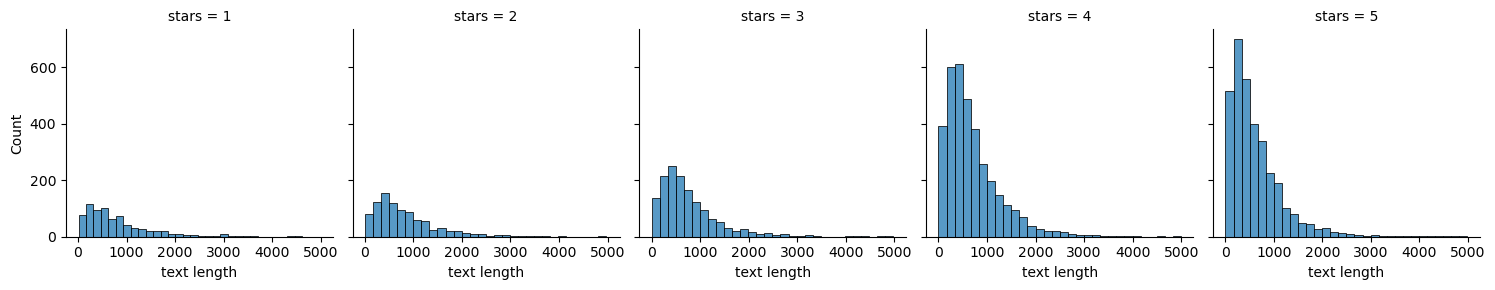

In [16]:
g=sns.FacetGrid(df,col='stars')
g.map(sns.histplot,'text length',bins=30)

<Axes: xlabel='text length', ylabel='Count'>

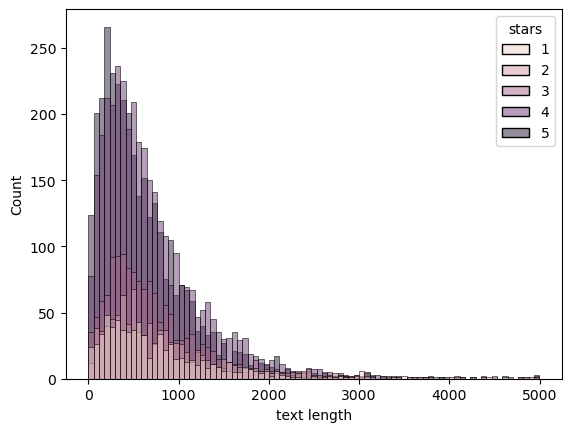

In [17]:
sns.histplot(df,x='text length',hue='stars')

<Axes: xlabel='stars', ylabel='text length'>

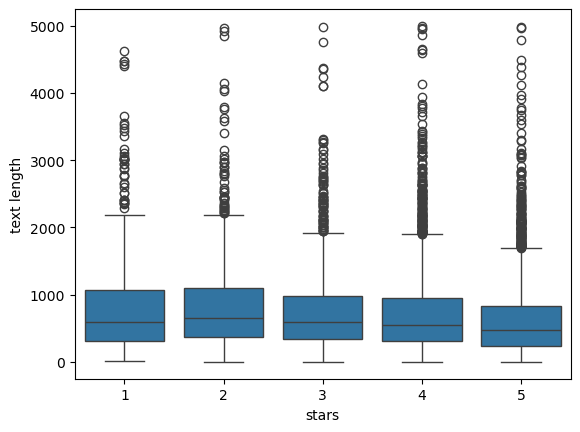

In [18]:
sns.boxplot(df,x='stars',y='text length')

<Axes: xlabel='stars', ylabel='count'>

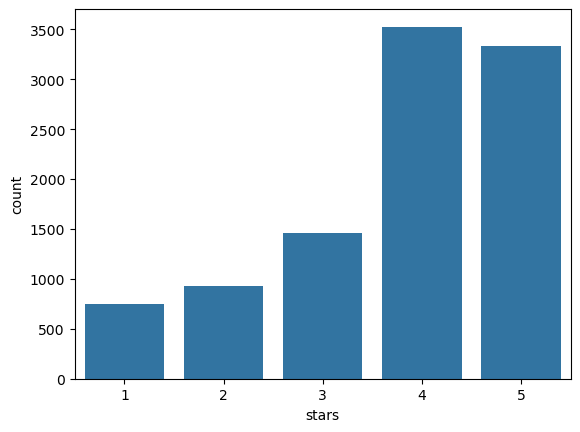

In [19]:
sns.countplot(df,x='stars')

**Using groupby to get the mean values of the numerical columns**

In [21]:
stars=df.groupby('stars').mean(numeric_only=True)
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


**Using the corr() method on that groupby dataframe to produce this dataframe:**

In [23]:
df[['cool','useful','funny','text length']].corr()

,cool,useful,funny,text length
cool,1.000000,0.887102,0.764342,0.241451
useful,0.887102,1.000000,0.723406,0.293975
funny,0.764342,0.723406,1.000000,0.251760
text length,0.241451,0.293975,0.251760,1.000000


In [24]:
df[['cool','useful','funny','text length']]

,cool,useful,funny,text length
0,2,5,0,889
1,0,0,0,1345
2,0,1,0,76
3,1,2,0,419
4,0,0,0,469
...,...,...,...,...
9995,1,2,0,668
9996,0,0,0,881
9997,0,0,0,1425
9998,0,0,0,880


In [25]:
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [26]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


**Then I use seaborn to create a heatmap based off that .corr() dataframe:**

<Axes: >

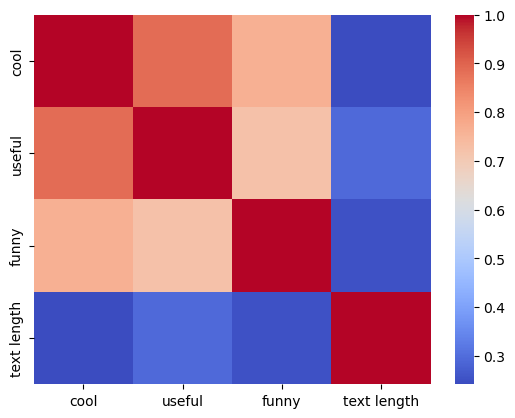

In [28]:
sns.heatmap(df[['cool','useful','funny','text length']].corr(),cmap='coolwarm')

## NLP Classification Task

Let's move on to the actual task. To make things a little easier, I only grab reviews that were either 1 star or 5 stars.

**Creating a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.**

**Let's create two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. (Your features and target/labels)**

In [31]:
yelp_class=df[(df['stars']==1) | (df['stars']==5)]
X= yelp_class['text']
y=yelp_class['stars']

<Axes: xlabel='stars', ylabel='Count'>

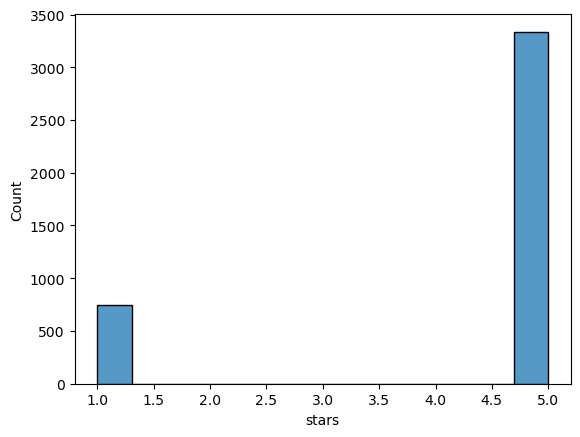

In [32]:
sns.histplot(y)

In [33]:
yelp_class.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4086 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   type         4086 non-null   object
 6   user_id      4086 non-null   object
 7   cool         4086 non-null   int64 
 8   useful       4086 non-null   int64 
 9   funny        4086 non-null   int64 
 10  text length  4086 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


**I will use the fit_transform method on the CountVectorizer object and pass in X (the 'text' column).**

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
cv = CountVectorizer(analyzer=text_analyzer)
X = cv.fit_transform(X)

## Train Test Split

Let's split our data into training and testing data.

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

## Training a Model

Time to train a model!


In [41]:
from sklearn.naive_bayes import MultinomialNB

**Now fiting nb using the training data.**

In [43]:
model=MultinomialNB().fit(X_train, y_train)

## Predictions and Evaluations

Time to see how our model did!

**Using the predict method off of nb to predict labels from X_test.**

In [45]:
pred=model.predict(X_test)

**Creating a confusion matrix and classification report using these predictions and y_test**

In [47]:
from sklearn.metrics import confusion_matrix, classification_report

In [48]:
print(confusion_matrix(y_test,pred))

[[151  77]
 [ 27 971]]


In [49]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.85      0.66      0.74       228
           5       0.93      0.97      0.95       998

    accuracy                           0.92      1226
   macro avg       0.89      0.82      0.85      1226
weighted avg       0.91      0.92      0.91      1226



**Great! Let's see what happens if we try to include TF-IDF to this process using a pipeline.**

# Using Text Processing


In [52]:
from sklearn.feature_extraction.text import TfidfTransformer

In [53]:
df=pd.read_csv('yelp.csv')
yelp_class=df[(df['stars']==1) | (df['stars']==5)]
X= yelp_class['text']
y=yelp_class['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)


cv = CountVectorizer().fit(X_train)
X_train = cv.transform(X_train)
X_test = cv.transform(X_test)

tfidf = TfidfTransformer().fit(X_train)
X_train = tfidf.transform(X_train)
X_test = tfidf.transform(X_test)


model=MultinomialNB().fit(X_train, y_train)
pred=model.predict(X_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


[[  2 226]
 [  0 998]]
              precision    recall  f1-score   support

           1       1.00      0.01      0.02       228
           5       0.82      1.00      0.90       998

    accuracy                           0.82      1226
   macro avg       0.91      0.50      0.46      1226
weighted avg       0.85      0.82      0.73      1226



**The model using TF-IDF actually performed worse. Probably because of small dataset**

## Using the Pipeline

**Time to use the pipeline.**

In [56]:
from sklearn.pipeline import Pipeline

In [57]:
pipe = Pipeline([('bow', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])


### Train Test Split

**We have to redo the train test split on the yelp_class object.**

In [59]:
df=pd.read_csv('yelp.csv')
yelp_class=df[(df['stars']==1) | (df['stars']==5)]
X= yelp_class['text']
y=yelp_class['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)


**Now I fit the pipeline to the training data. I can't use the same training data as last time because that data has already been vectorized. We need to pass in just the text and labels**

In [61]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

### Predictions and Evaluation

** Now use the pipeline to predict from the X_test and create a classification report and confusion matrix. You should notice strange results.**

In [63]:
pred=pipe.predict(X_test)

In [64]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[  2 226]
 [  0 998]]
              precision    recall  f1-score   support

           1       1.00      0.01      0.02       228
           5       0.82      1.00      0.90       998

    accuracy                           0.82      1226
   macro avg       0.91      0.50      0.46      1226
weighted avg       0.85      0.82      0.73      1226



**The model using TF-IDF actually performed worse than TF. Probably because of small and unbalanced dataset**

# THE END!